In [1]:
import requests
import json
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CXUENTRTAINLB0901M',
                                'CXUENTRTAINLB0903M',
                                'CXUENTRTAINLB0904M',
                                'CXUENTRTAINLB0905M',
                                'CXUENTEROTHLB0901M',
                                'CXUENTEROTHLB0903M',
                                'CXUENTEROTHLB0904M',
                                'CXUENTEROTHLB0905M',
                                'CXUFEESADMLB0901M',
                                'CXUFEESADMLB0903M',
                                'CXUFEESADMLB0904M',
                                'CXUFEESADMLB0905M',
                                'CXUPETSLB0901M',
                                'CXUPETSLB0903M',
                                'CXUPETSLB0904M',
                                'CXUPETSLB0905M',
                                'CXUTOYSLB0901M',
                                'CXUTOYSLB0903M',
                                'CXUTOYSLB0904M',
                                'CXUTOYSLB0905M',
                                'CXUTVAUDIOLB0901M',
                                'CXUTVAUDIOLB0903M',
                                'CXUTVAUDIOLB0904M',
                                'CXUTVAUDIOLB0905M',
                                'CXUTOTALEXPLB0901M',
                                'CXUTOTALEXPLB0903M',
                                'CXUTOTALEXPLB0904M',
                                'CXUTOTALEXPLB0905M'
                               ],
                   "startyear":"2017", 
                   "endyear":"2017",
                   "catalog":True, 
                   "calculations":True, 
                   "annualaverage":True,
            "registrationkey":"a3f26c081d1546a58b1461108c6f62f9"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

json_data = json.loads(p.text)

pp.PrettyPrinter(indent=2)
output = open("CXENTERTAIN" + '.json','w')
pp.pprint(json_data, stream=output)
output.close()


In [3]:
list1 = []
tlist1 = []
tlist2 = []


if json_data['status'] == "REQUEST_SUCCEEDED":
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
#         print(series['catalog']['item'])
        series_title = series['catalog']['series_title']
        titleList = series_title.split('by Race:', 1)
        tlist1.append(titleList[0])
        tlist2.append(titleList[1])
        #print(series_title)
        for item in series['data']:
            
            year = item['year']
            period = item['period']
            value = int(item['value'])
            list1.append(value)
            dict1 = {''}
        #print("Year:" + year + " Value:" + value)

else:
    print(json_data['status'])


    

In [4]:
df = pd.DataFrame(np.column_stack([list1, tlist1, tlist2]), 
                               columns=['value', 'Category', 'Race'])
df.value = pd.to_numeric(df.value, errors='coerce')



In [5]:
df

,value,Category,Race
0,3203,Entertainment,All Consumer Units
1,3475,Entertainment,Race of rf. pers.: White and All Others(from ...
2,2797,Entertainment,Race of reference person: Asian(from 2003)
3,1643,Entertainment,Race of ref. person: Black or African American
4,599,"Entertainment: other supplies, equip., & servi...",All Consumer Units
5,693,"Entertainment: other supplies, equip., & servi...",Race of rf. pers.: White and All Others(from ...
6,232,"Entertainment: other supplies, equip., & servi...",Race of reference person: Asian(from 2003)
7,145,"Entertainment: other supplies, equip., & servi...",Race of ref. person: Black or African American
8,750,Entertainment: fees and admissions,All Consumer Units
9,782,Entertainment: fees and admissions,Race of rf. pers.: White and All Others(from ...


In [54]:

lf = df.pivot(index='Race', columns='Category', values='value')

lf
#must rename indices/cols

#rename indices

lf.index
lf = lf.rename(index={' Race of ref. person: Black or African American': 'Black or African American', ' Race of reference person: Asian(from 2003)': 'Asian', ' Race of rf. pers.: White and All Others(from 2003)': 'White and All Others'})
lf

Category,Audio and visual equipment and services,Entertainment,Entertainment: fees and admissions,"Entertainment: other supplies, equip., & services",Pets,Total average annual expenditures,"Toys, hobbies, and playground equipment"
Race,,,,,,,
All Consumer Units,985,3203,750,599,710,60060,159
Black or African American,848,1643,313,145,226,43117,111
Asian,772,2797,1400,232,265,72850,128
White and All Others,1021,3475,782,693,811,62032,168


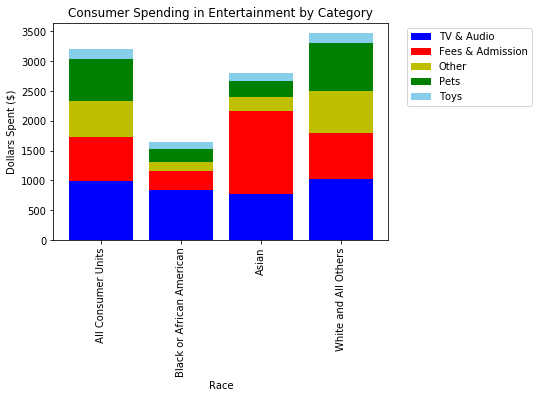

In [71]:
#Could make pie charts for each race and the percent of entertainment spending by category
xlabels = lf.index
xl = np.arange(len(xlabels))
#print(t_df

audio = lf['Audio and visual equipment and services ']
fees = lf['Entertainment: fees and admissions ']
other = lf['Entertainment: other supplies, equip., & services ']
pets = lf['Pets ']
toys = lf['Toys, hobbies, and playground equipment ']

p1 = plt.bar(xlabels, audio, align='center', color ='b', label='TV & Audio')

p2 = plt.bar(xlabels, fees, align='center', color ='r', bottom=audio, label='Fees & Admission')
p3 = plt.bar(xlabels, other, align='center', color ='y', bottom=[i+j for i,j in zip(audio, fees)], label='Other')
p4 = plt.bar(xlabels, pets, align='center', color ='g', bottom=[i+j+k for i,j,k in zip(audio, fees, other)], label='Pets')
p5 = plt.bar(xlabels, toys, align='center', color ='skyblue', bottom=[i+j+k+l for i,j,k,l in zip(audio, fees, other, pets)],label='Toys')

#stack plots
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Consumer Spending in Entertainment by Category')
plt.xlabel('Race')
plt.ylabel('Dollars Spent ($)')
plt.show()